In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def temp_to_theta(t_K, lev_hPa):
    kappa =  0.2854
    P0 = 1000. 
    theta = t_K
    for k, p in enumerate(lev_hPa):
        theta[:,k,:,:] = t_K[:,k,:,:] * (P0 / p)**(kappa)
    return theta

In [3]:
def quick_load_var(loc, var, table, model, experiment, member):
    fils = sorted(
        list(Path(loc).glob("_".join([var, table, model, experiment, member, "*.nc"])))
    )
    if len(fils) == 0:
        raise IOError("Can not find the files.")
    elif len(fils) == 1:
        ds = xr.open_dataset(fils[0])
    else:
        ds = xr.open_mfdataset(fils, combine="by_coords")
    return ds[var].compute()


data_loc = Path("/Volumes/Jedha/CMIP6")

sims = {"cesm-amip": ("CESM2", "amip", "r1i1p1f1"),
        "cesm-amip-off": ("CESM2","amip-lwoff","r1i1p1f1"),
        "cesm-amip-4x": ("CESM2","amip-4xCO2","r1i1p1f1"),
        "cesm-aqua": ("CESM2", "aqua-control", "r1i1p1f1"),
        "cesm-aqua-off": ("CESM2", "aqua-control-lwoff", "r1i1p1f1"),
        "cesm-aqua-4x": ("CESM2", "aqua-4xCO2", "r1i1p1f1"),
        "ipsl-amip": ("IPSL-CM6A-LR", "amip", "r1i1p1f1"),
        "ipsl-amip-off": ("IPSL-CM6A-LR", "amip-lwoff", "r1i1p1f1"),
        "ipsl-aqua": ("IPSL-CM6A-LR", "aqua-control", "r1i1p1f1"),
        "ipsl-aqua-off": ("IPSL-CM6A-LR", "aqua-control-lwoff", "r1i1p1f1"),
        "cnrm-amip": ("CNRM-CM6-1", "amip", "r1i1p1f2"),
        "cnrm-amip-off": ("CNRM-CM6-1", "amip-lwoff", "r1i1p1f2"),
        "cnrm-amip-4x": ("CNRM-CM6-1", "amip-4xCO2", "r1i1p1f2"),
        "cnrm-aqua": ("CNRM-CM6-1", "aqua-control", "r1i1p1f2"),
        "cnrm-aqua-off": ("CNRM-CM6-1", "aqua-control-lwoff", "r1i1p1f2"),
        "cnrm-aqua-4x": ("CNRM-CM6-1", "aqua-4xCO2", "r1i1p1f2"),
        "mri-amip" : ("MRI-ESM2-0", "amip", "r1i1p1f1"),
        "mri-amip-off" : ("MRI-ESM2-0", "amip-lwoff", "r1i1p1f1"),
        "hadgem-amip" : ("HadGEM3-GC31-LL", "amip", "r1i1p1f3"),
        "hadgem-amip-off" : ("HadGEM3-GC31-LL", "amip-lwoff", "r5i1p1f2"),
        "hadgem-aqua" : ("HadGEM3-GC31-LL", "aqua-control", "r1i1p1f3"),
        "hadgem-aqua-off" : ("HadGEM3-GC31-LL", "aqua-control-lwoff", "r1i1p1f3"),
        "hadgem-aqua-4x" : ("HadGEM3-GC31-LL", "aqua-4xCO2", "r1i1p1f3")
       }


In [4]:
data_loc = Path("/Volumes/Jedha/CMIP6")

A = "amip"
M = "cesm"
i0 = f"cnrm-{A}"
i1 = f"cnrm-{A}-off"
i2 = f"cnrm-{A}-4x"

c0 = quick_load_var(data_loc, 'ta', 'Amon', *sims[i0])
c1 = quick_load_var(data_loc, 'ta', 'Amon', *sims[i1])
c2 = quick_load_var(data_loc, 'ta', 'Amon', *sims[i2])

In [5]:
c0_zm = c0.mean(dim=('time','lon'))
c1_zm = c1.mean(dim=('time','lon'))
c2_zm = c2.mean(dim=('time','lon'))


c0_theta = temp_to_theta(c0, c0['plev']/100)
c1_theta = temp_to_theta(c1, c1['plev']/100)
c2_theta = temp_to_theta(c2, c2['plev']/100)

c0_theta_zm = c0_theta.mean(dim=("time", "lon"))
c1_theta_zm = c1_theta.mean(dim=("time", "lon"))
c2_theta_zm = c2_theta.mean(dim=("time", "lon"))

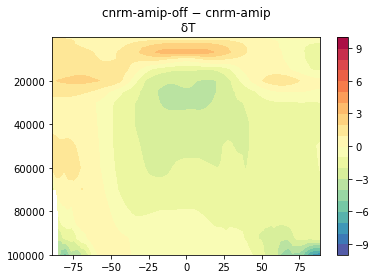

In [6]:
fig, ax = plt.subplots()

lats,levs = np.meshgrid(c0_zm['lat'], c0_zm['plev'])

img = ax.contourf(lats, levs, c1_zm - c0_zm, levels=np.linspace(-10, 10, 21), cmap='Spectral_r')

ax.invert_yaxis()
ax.set_title(f"{i1} \u2212 {i0}\n δT")
fig.colorbar(img)


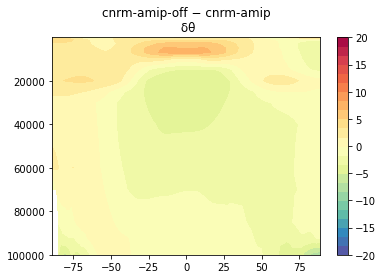

In [7]:
fig, ax = plt.subplots()

lats,levs = np.meshgrid(c0_zm['lat'], c0_zm['plev'])



img = ax.contourf(lats, levs, c1_theta_zm-c0_theta_zm, levels=np.linspace(-20, 20, 25), cmap='Spectral_r')

ax.invert_yaxis()
ax.set_title(f"{i1} \u2212 {i0}\n δθ")
fig.colorbar(img)



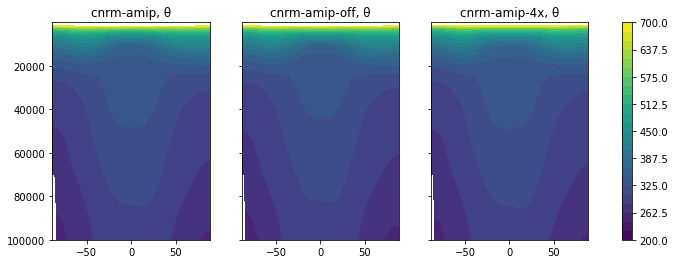

In [8]:
fig, ax = plt.subplots(figsize=(12,4),ncols=3, sharey=True)

lats,levs = np.meshgrid(c0_zm['lat'], c0_zm['plev'])

img0 = ax[0].contourf(lats, levs, c0_theta_zm, levels=np.linspace(200, 700, 25))

img1 = ax[1].contourf(lats, levs, c1_theta_zm, levels=np.linspace(200, 700, 25))
img2 = ax[2].contourf(lats, levs, c2_theta_zm, levels=np.linspace(200, 700, 25))

ax[0].invert_yaxis()
ax[0].set_title(f"{i0}, θ")
ax[1].set_title(f"{i1}, θ")
ax[2].set_title(f"{i2}, θ")
fig.colorbar(img0, ax=ax.ravel())



(-10.0, 10.0)

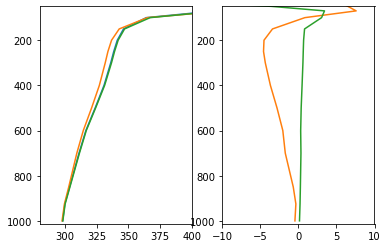

In [9]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(c0_theta_zm.sel(lat=0, method='nearest'), c0_theta_zm['plev']/100,
           c1_theta_zm.sel(lat=0, method='nearest'), c1_theta_zm['plev']/100,
           c2_theta_zm.sel(lat=0, method='nearest'), c2_theta_zm['plev']/100)
ax[0].invert_yaxis()
ax[0].set_xlim([280,400])
ax[0].set_ylim([1013, 50])

ax[1].plot(c1_theta_zm.sel(lat=0, method='nearest')-c0_theta_zm.sel(lat=0, method='nearest'), c0_theta_zm['plev']/100, color='C1')
ax[1].plot(c2_theta_zm.sel(lat=0, method='nearest')-c0_theta_zm.sel(lat=0, method='nearest'), c0_theta_zm['plev']/100, color='C2')
ax[1].invert_yaxis()
ax[1].set_ylim([1013, 50])
ax[1].set_xlim([-10, 10])

(-10.0, 10.0)

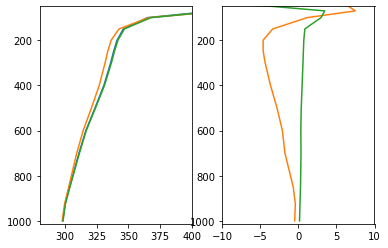

In [11]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(c0_theta_zm.sel(lat=slice(-10,10)).mean(dim='lat'), c0_theta_zm['plev']/100,
           c1_theta_zm.sel(lat=slice(-10,10)).mean(dim='lat'), c1_theta_zm['plev']/100,
           c2_theta_zm.sel(lat=slice(-10,10)).mean(dim='lat'), c2_theta_zm['plev']/100)
ax[0].invert_yaxis()
ax[0].set_xlim([280,400])
ax[0].set_ylim([1013, 50])

ax[1].plot(c1_theta_zm.sel(lat=slice(-10,10)).mean(dim='lat')-c0_theta_zm.sel(lat=slice(-10,10)).mean(dim='lat'), c0_theta_zm['plev']/100, color='C1')
ax[1].plot(c2_theta_zm.sel(lat=slice(-10,10)).mean(dim='lat')-c0_theta_zm.sel(lat=slice(-10,10)).mean(dim='lat'), c0_theta_zm['plev']/100, color='C2')
ax[1].invert_yaxis()
ax[1].set_ylim([1013, 50])
ax[1].set_xlim([-10, 10])